<a href="https://colab.research.google.com/github/GeneralHassaan/Projects/blob/main/analysis_of_Kmeans_hassaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#hassaan 

In [6]:
# imports

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles

In [7]:
filename = '/content/cust_seg.csv'

df = pd.read_csv(filename)

df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [25]:
df.drop(columns = ['Unnamed: 0' , 'Customer Id'])

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,1
2,33,2,10,57,6.111,5.802,1.0,20.9,1
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,1
...,...,...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,0.0,4.4,0
846,28,2,7,34,0.359,2.021,0.0,7.0,0
847,25,4,0,18,2.802,3.210,1.0,33.4,0
848,32,1,12,28,0.116,0.696,0.0,2.9,0


In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [10]:
df.describe()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,424.50000,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,0.00000,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,212.25000,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,424.50000,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,636.75000,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,849.00000,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [11]:
df.isna().any()

Unnamed: 0         False
Customer Id        False
Age                False
Edu                False
Years Employed     False
Income             False
Card Debt          False
Other Debt         False
Defaulted           True
DebtIncomeRatio    False
dtype: bool

In [12]:
df.dropna(inplace = True)

In [13]:
df.isna().sum()

Unnamed: 0         0
Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [14]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
X_scaled.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,-1.766243,-1.766243,0.768304,0.298793,-0.359007,-0.723102,-0.675699,-0.604284,-0.594950,-0.580528
1,-1.762130,-1.762130,1.519090,-0.779325,2.647029,1.478707,1.431421,1.570620,-0.594950,0.372222
2,-1.758018,-1.758018,-0.232744,0.298793,0.242201,0.309845,2.154119,0.835201,1.680814,1.559495
3,-1.753905,-1.753905,-0.733267,0.298793,-0.659610,-0.723102,-0.412427,-0.773833,-0.594950,-0.580528
4,-1.749792,-1.749792,1.519090,-0.779325,3.398538,5.637681,3.665215,1.780653,-0.594950,-0.448609


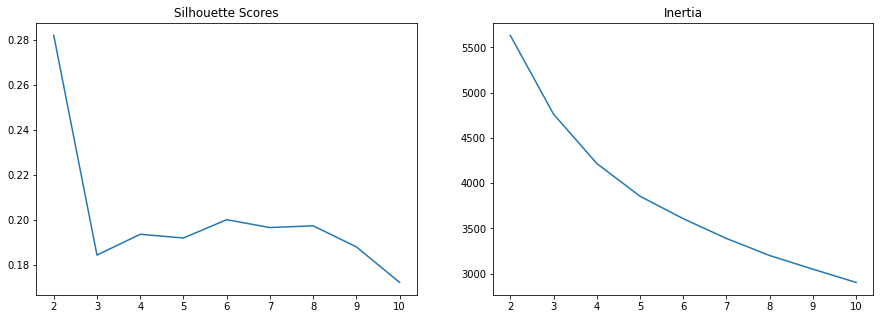

In [15]:
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3,3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9,1
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3,3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [17]:
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,662.565022,663.565022,34.825112,1.596413,8.080717,38.524664,0.872143,1.960085,0.026906,7.759193
1,1,414.740260,415.740260,31.181818,1.824675,3.616883,29.525974,1.485779,2.667682,0.974026,14.184416
2,2,421.428571,422.428571,43.318681,2.098901,17.054945,105.175824,4.922835,9.109549,0.285714,15.603297
3,3,218.323276,219.323276,34.017241,1.629310,8.452586,39.706897,0.931983,1.999336,0.004310,7.964655


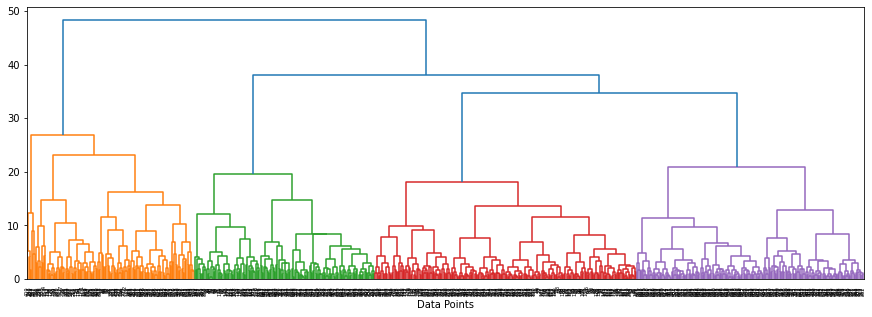

In [18]:
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(X_scaled, method = 'ward'))
plt.xlabel('Data Points');

In [19]:
#using this dendogram, we are able to determine which clusters have the greatest 
# distance b/w clusters.

In [20]:
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(X_scaled)


AgglomerativeClustering()

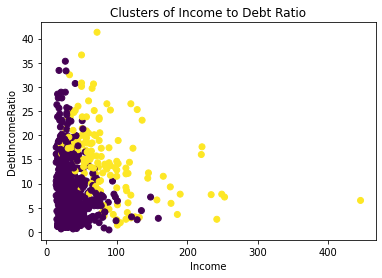

In [21]:
df['cluster'] = hc.labels_
# Visualize the clusters
plt.scatter(df['Income'], df['DebtIncomeRatio'], c = df['cluster'])
plt.xlabel('Income')
plt.ylabel('DebtIncomeRatio')
plt.title('Clusters of Income to Debt Ratio');


In [22]:
circles = make_circles(n_samples=1000, noise=.15, factor=.1, random_state=42)[0]
circles[:5]

array([[ 0.00624286,  0.14012181],
       [ 0.06728077,  0.13200944],
       [-0.20771233,  0.37761054],
       [-0.30811441, -0.06441166],
       [ 0.46257516, -0.88599616]])

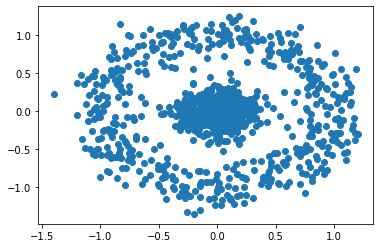

In [23]:
ircles = scaler.fit_transform(circles)
plt.scatter(circles[:,0], circles[:,1])

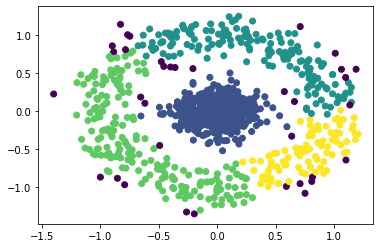

In [24]:
min_samples = 20
dbs = DBSCAN(eps = 0.2, min_samples = min_samples).fit(circles)
plt.scatter(circles[:,0], circles[:,1], c=dbs.labels_);

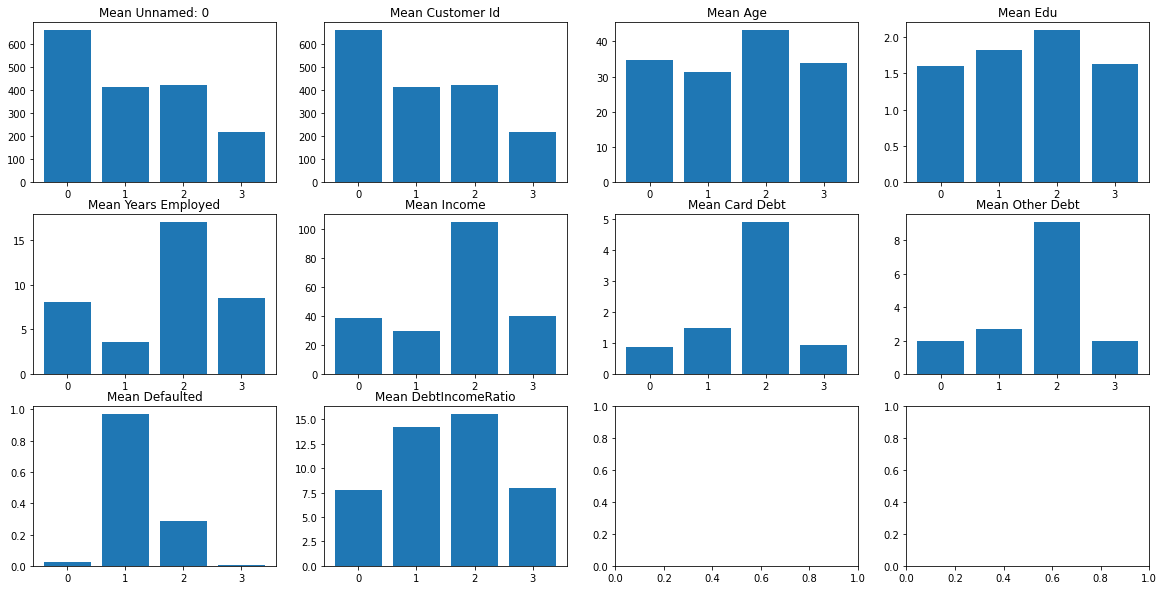

In [27]:
fig, axes = plt.subplots(3,4, figsize = (20, 10))
axes = axes.ravel()
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')